# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [31]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
# 設定 data_path
dir_data = 'C:/Users/USER/Desktop/D8'

In [33]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: C:/Users/USER/Desktop/D8\application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

作業
1.請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP

0 個小孩
有 1 - 2 個小孩
有 3 - 5 個小孩
有超過 5 個小孩

In [34]:
app_train['CNT_CHILDREN'].describe()

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [35]:
app_train['CNT_CHILDREN'].value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [36]:
#1

cut_rule = [-1,0,2,5,app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

作業2
請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot

In [37]:
app_train.groupby(['CNT_CHILDREN_GROUP']).describe()

AMT_ANNUITY                                               \
                         count          mean           std     min      25%   
CNT_CHILDREN_GROUP                                                            
(-1.001, 0.0]         215359.0  26909.255771  14448.287588  1615.5  16456.5   
(0.0, 2.0]             87868.0  27549.231996  14546.573518  2187.0  16722.0   
(2.0, 5.0]              4230.0  28124.648936  15451.248622  2979.0  17302.5   
(5.0, 19.0]               42.0  24899.357143  12354.971673  5301.0  15687.0   

                                                  AMT_CREDIT                 \
                         50%        75%       max      count           mean   
CNT_CHILDREN_GROUP                                                            
(-1.001, 0.0]       24579.00  34303.500  230161.5   215371.0  599103.042833   
(0.0, 2.0]          25587.00  35397.000  258025.5    87868.0  598436.958978   
(2.0, 5.0]          26154.00  35755.875  225000.0     4230.0  608219.443617   
(5.0, 19.0]         23766.75  30528.000   59094.0       42.0  510376.178571   

                     ...   YEARS_BUILD_MEDI         YEARS_BUILD_MODE  \
                     ...                75%     max            count   
CNT_CHILDREN_GROUP   ...                                               
(-1.001, 0.0]        ...             0.8256  1.0000          72857.0   
(0.0, 2.0]           ...             0.8256  1.0000          29240.0   
(2.0, 5.0]           ...             0.8390  1.0000            915.0   
(5.0, 19.0]          ...             0.9262  0.9665             11.0   

                                                                         \
                        mean       std     min     25%     50%      75%   
CNT_CHILDREN_GROUP                                                        
(-1.001, 0.0]       0.757767  0.109788  0.0000  0.6929  0.7583  0.82360   
(0.0, 2.0]          0.763911  0.110289  0.0000  0.6994  0.7648  0.83010   
(2.0, 5.0]          0.771500  0.124444  0.0000  0.6994  0.7779  0.83670   
(5.0, 19.0]         0.798636  0.135073  0.6406  0.6864  0.7517  0.92815   

                            
                       max  
CNT_CHILDREN_GROUP          
(-1.001, 0.0]       1.0000  
(0.0, 2.0]          1.0000  
(2.0, 5.0]          1.0000  
(5.0, 19.0]         0.9673  

[4 rows x 848 columns]

In [38]:
#2-1
grp = 'CNT_CHILDREN_GROUP'

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(-1.001, 0.0]    166288.713566
(0.0, 2.0]       174725.712648
(2.0, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

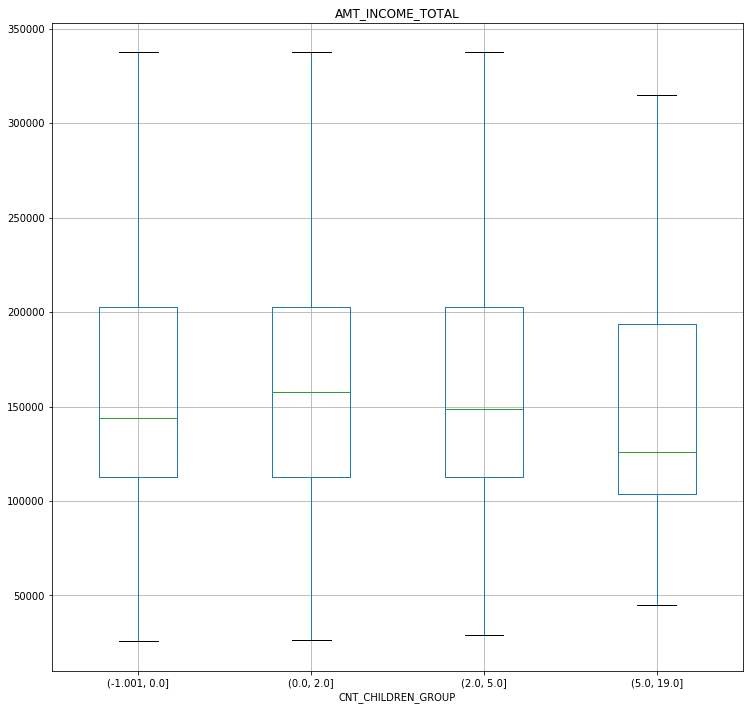

In [39]:
#2-2

plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('')
plt.show()

作業3
請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 Z 轉換 後的分數

In [41]:
#3

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x-np.mean(x)/(np.std(x)) ))


app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,202498.411762
1,270000.0,269998.411762
2,67500.0,67498.411762
3,135000.0,134998.411762
4,121500.0,121498.411762
